# Prediction of employee retention with various features
## LogisticRegression is being used for binary classification

link to dataset : https://www.kaggle.com/datasets/liujiaqi/hr-comma-sepcsv


# data preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.tail(50)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14949,0.42,0.57,2,147,3,1,1,0,management,low
14950,0.39,0.68,2,282,5,0,1,0,marketing,low
14951,0.39,0.54,2,154,3,0,1,0,marketing,low
14952,0.44,0.52,2,149,3,0,1,0,marketing,low
14953,0.37,0.45,2,149,3,0,1,0,sales,low
14954,0.39,0.53,2,146,3,0,1,0,sales,low
14955,0.72,0.94,4,258,5,0,1,0,sales,low
14956,0.37,0.49,2,148,3,0,1,0,sales,low
14957,0.82,0.94,5,236,5,0,1,0,sales,low
14958,0.42,0.52,2,134,3,0,1,0,sales,low


# Data exploration and visualization

In [3]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [4]:
df.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [5]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [7]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [8]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [9]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


from above table we can conclude:
**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm 

## Impact of salary on employee retention

<AxesSubplot:xlabel='salary'>

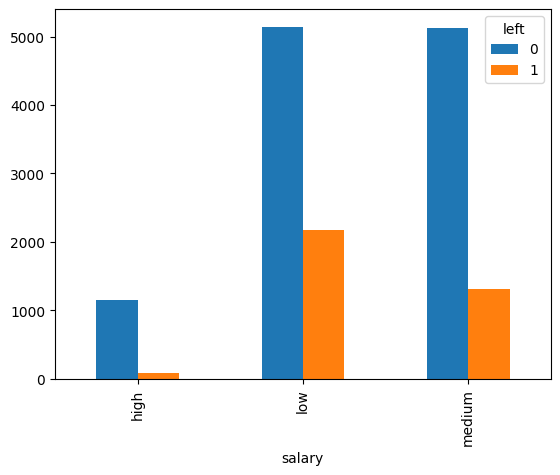

In [10]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

***it seems high salary helps to retain the employeers, we will include this feature***

## Department wise employee retention rate

<AxesSubplot:xlabel='Department'>

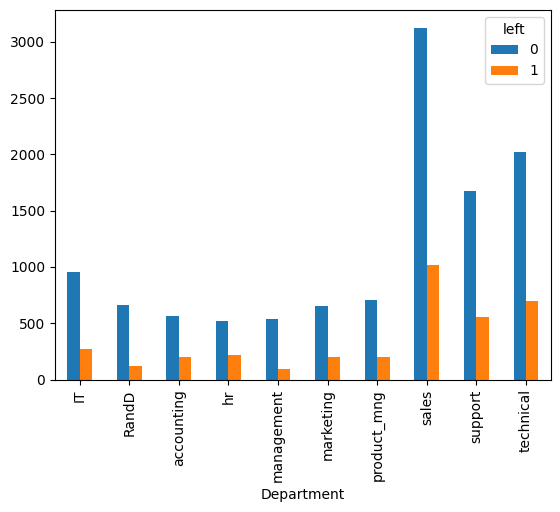

In [11]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

***their is no major effect of depatment , so we can neglect it***

### we can drop last_evalution column and number_project also

In [12]:
df.drop(['last_evaluation','number_project' ], axis = 1, inplace = True)


In [13]:
df.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,3,0,1,0,sales,low
1,0.80,262,6,0,1,0,sales,medium
2,0.11,272,4,0,1,0,sales,medium
3,0.72,223,5,0,1,0,sales,low
4,0.37,159,3,0,1,0,sales,low


these are important features accoroding to corr functions

In [14]:
df.columns

Index(['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left', 'promotion_last_5years', 'Department',
       'salary'],
      dtype='object')

In [15]:
X = df.drop(['left'], axis = 1)
y = df['left']

In [16]:
X

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,157,3,0,0,sales,low
1,0.80,262,6,0,0,sales,medium
2,0.11,272,4,0,0,sales,medium
3,0.72,223,5,0,0,sales,low
4,0.37,159,3,0,0,sales,low
...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,support,low
14995,0.37,160,3,0,0,support,low
14996,0.37,143,3,0,0,support,low
14997,0.11,280,4,0,0,support,low


In [17]:
len(X)

14999

## OneHotEncoding for categorical variables

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(),[-1,-2])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))


In [19]:
X

array([[0., 1., 0., ..., 3., 0., 0.],
       [0., 0., 1., ..., 6., 0., 0.],
       [0., 0., 1., ..., 4., 0., 0.],
       ...,
       [0., 1., 0., ..., 3., 0., 0.],
       [0., 1., 0., ..., 4., 0., 0.],
       [0., 1., 0., ..., 3., 0., 0.]])

## train_test_split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
len(X_test)

3750

## model building

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## predictions

In [23]:
y_pred = lr.predict(X_test)

## accuracy

In [24]:
lr.score(X_test,y_test)

0.7629333333333334

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm


array([[2635,  218],
       [ 671,  226]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

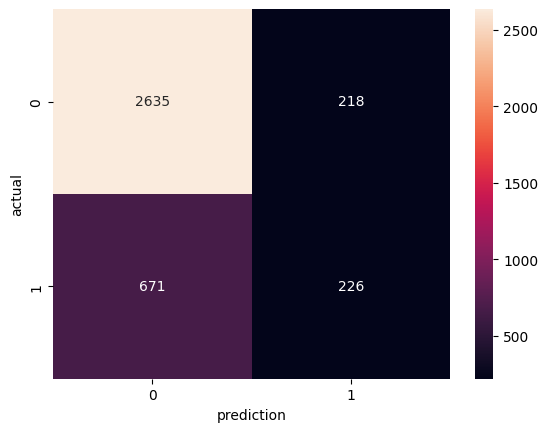

In [26]:
import seaborn as sns
plt.figure()
sns.heatmap(cm, annot = True,fmt='g')
plt.xlabel('prediction')
plt.ylabel('actual')

# GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [28]:
'''def finding_best_model(X,y):
    model_params = {
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {
                'C':[1,2,5,10]
            }
        },
        'SVC': {
            'model': SVC(),
            'params': {
                'C':[1,2,5,10],
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma':['scale', 'auto']
            }
        },
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':['gini', 'entropy'],
                'splitter': ['best', 'random']
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion':['gini', 'entropy'],
                'n_estimators': [20,50,100,200]
            }
        }
    
    }

    score = []
    for model_name, mp in model_params.items():
        clf = GridSearchCV(mp['model'], mp['params'],cv=10, return_train_score=False)
        clf.fit(X,y)
        score.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])'''

"def finding_best_model(X,y):\n    model_params = {\n        'LogisticRegression': {\n            'model': LogisticRegression(),\n            'params': {\n                'C':[1,2,5,10]\n            }\n        },\n        'SVC': {\n            'model': SVC(),\n            'params': {\n                'C':[1,2,5,10],\n                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],\n                'gamma':['scale', 'auto']\n            }\n        },\n        'DecisionTreeClassifier': {\n            'model': DecisionTreeClassifier(),\n            'params': {\n                'criterion':['gini', 'entropy'],\n                'splitter': ['best', 'random']\n            }\n        },\n        'RandomForestClassifier': {\n            'model': RandomForestClassifier(),\n            'params': {\n                'criterion':['gini', 'entropy'],\n                'n_estimators': [20,50,100,200]\n            }\n        }\n    \n    }\n\n    score = []\n    for model_name, mp in model_params.items

In [ ]:
def finding_best_model(X,y):
    model_params = {
        'SVC': {
            'model': SVC(),
            'params': {
                'C':[1,2,5,10],
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma':['scale', 'auto']
            }
        },
        'DecisionTreeClassifier': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':['gini', 'entropy'],
                'splitter': ['best', 'random']
            }
        },
        'RandomForestClassifier': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion':['gini', 'entropy'],
                'n_estimators': [20,50,100,200]
            }
        }
    
    }

    score = []
    for model_name, mp in model_params.items():
        clf = GridSearchCV(mp['model'], mp['params'],cv=10, return_train_score=False)
        clf.fit(X,y)
        score.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return pd.DataFrame(score,columns=['model','best_score','best_params'])

In [ ]:
finding_best_model(X,y)